In [1]:
# Load the nltk package
# nltk - natural language toolkit
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\KUMAR
[nltk_data]    |     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagge

True

In [3]:
# import dataset
import pandas as pd
tweets = pd.read_csv('tweets.csv')
tweets.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
tweets.shape

(7920, 3)

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [9]:
#### 0 refers to positive sentiment, 1 is negative sentiment
### let's map 0 as 1, and 1 as 0
tweets['label'] = tweets['label'].map({0:1, 1:0})
tweets.head()

,id,label,tweet
0,1,1,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,1,Finally a transparant silicon case ^^ Thanks t...
2,3,1,We love this! Would you go? #talk #makememorie...
3,4,1,I'm wired I know I'm George I was made that wa...
4,5,0,What amazing service! Apple won't even talk to...


# Basic Exploratory Data Analysis (EDA) and Preprocessing 

In [12]:
# check for missing values
tweets.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [14]:
# drop the id column
tweets.drop('id', axis=1, inplace=True)

In [16]:
tweets.head()

,label,tweet
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,1,Finally a transparant silicon case ^^ Thanks t...
2,1,We love this! Would you go? #talk #makememorie...
3,1,I'm wired I know I'm George I was made that wa...
4,0,What amazing service! Apple won't even talk to...


In [20]:
tweets['label'].value_counts(normalize=True)

label
1    0.744192
0    0.255808
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

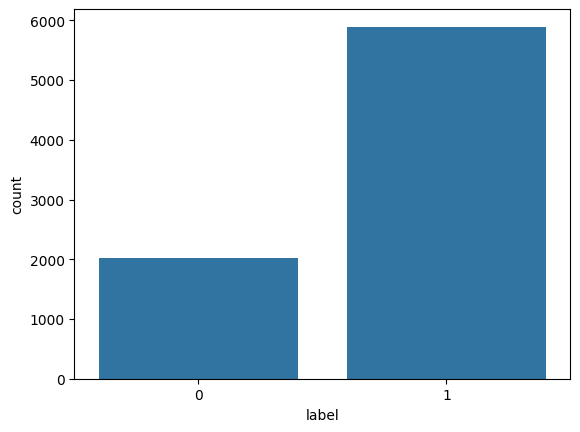

In [22]:
import seaborn as sns
sns.countplot(data=tweets, x='label')

# Data Cleaning

In [25]:
tweets.head()

,label,tweet
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,1,Finally a transparant silicon case ^^ Thanks t...
2,1,We love this! Would you go? #talk #makememorie...
3,1,I'm wired I know I'm George I was made that wa...
4,0,What amazing service! Apple won't even talk to...


In [27]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [29]:
# Let's substitute 's with "is"
import re
re.sub(r"'s\b"," is", tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [31]:
tweets['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [47]:
re.sub("@[A-Za-z0-9]+","",tweets['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [63]:
re.sub("@|#|!","",tweets['tweet'][11])

'Ha Not heavy machinery but it does what I need it to. Apple really dropped the ball with that design. drinkyourhaterade'

In [65]:
tweets['tweet'][1]

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [67]:
# remove hyperlinks
re.sub(r"http\S+","",tweets['tweet'][1])

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… '

In [73]:
tweets['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [75]:
tweets['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [77]:
re.sub(r"[^ a-zA-Z]","",tweets['tweet'][11])

'Ha Not heavy machinery but it does what I need it to Apple really dropped the ball with that design drinkyourhaterade'

In [79]:
re.sub(r"[^ a-zA-Z]","",tweets['tweet'][25])

' billion for  patents where there is prior art   millions each  patent trolls are partying now thanks to Apple apple'

In [81]:
# Stop words
import nltk
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'i', 'than', 'mightn', 'from', 'are', 'haven', 'theirs', 'where', 'y', "hasn't", "that'll", 'off', 'other', 'doing', 'how', "it'll", 'above', 'been', 'do', 'is', 'there', 'weren', 'own', 've', 'against', 'again', 'because', 'doesn', "she'd", "you'd", 'himself', "i'll", 'our', 'd', 'for', 'not', 'some', 'couldn', 'wouldn', "aren't", 'between', 'didn', 'on', "they've", "he'll", 'hers', "we've", 'now', 'aren', 'over', "i'd", 'myself', "i'm", 'most', 'their', 'to', 'when', 'out', 'yourself', "he'd", "haven't", 'nor', 'itself', 'then', "they're", 'needn', 'ain', 'it', "they'd", 'no', "wasn't", "mustn't", "didn't", 'can', 'this', 'into', 'does', 're', 'o', 'what', 'don', 'yourselves', 'up', "couldn't", 'too', 'by', 'them', 'both', 'being', 'that', 'had', 'of', 'as', 'hadn', 'whom', 'here', 'which', 'won', "you've", 'before', 'each', 'has', "mightn't", 'so', 'its', 'more', 'be', 'just', 'who', 'was', 'him', 'they', "it'd", 'your', "she'll", 'hasn', 'through', 'm', 'below', "they'll", 'ma', "

In [83]:
len(nltk_stopwords)

198

In [87]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'from', 'detail', 'are', 'one', 'five', 'where', 'made', 'two', 'how', 'without', 'although', 'neither', 'there', 'above', 'is', 'whatever', 'own', 'because', 'con', 'himself', 'ten', 'for', 'could', 'therefore', 'not', 'some', 'beside', 'indeed', 'on', 'bottom', 'now', 'toward', 'most', 'rather', 'anyway', 'nor', 'already', 'throughout', 'twenty', 'cry', 'sincere', 'fifteen', 'none', 'last', 'ever', 'alone', 'this', 'can', 'full', 'formerly', 'six', 'ltd', 'what', 'both', 'front', 'that', 'call', 'had', 'us', 'whom', 'here', 'which', 'hereafter', 'before', 'next', 'top', 'every', 'each', 'everyone', 'nothing', 'so', 'more', 'thence', 'who', 'others', 'be', 'was', 'him', 'another', 'per', 'seem', 'your', 'below', 'become', 'afterwards', 'very', 'further', 'a', 'at', 'all', 'go', 'though', 'part', 'upon', 'take', 'towards', 'any', 'if', 'these', 'nine', 'else', 'often', 'anything', 'besides', 'seeming', 'me', 'among', 'either', 'beforehand', 'during', 'yours', 'am', 'eleven', 'keep', '

In [89]:
len(sklearn_stopwords)

318

In [91]:
# Find the comman stopwords from NLTK and SKLEARN
print(sklearn_stopwords.intersection(nltk_stopwords))

{'i', 'than', 'from', 'are', 'where', 'off', 'other', 'how', 'above', 'been', 'do', 'is', 'there', 'own', 'against', 'again', 'because', 'himself', 'our', 'for', 'not', 'some', 'between', 'on', 'hers', 'now', 'over', 'myself', 'their', 'most', 'to', 'when', 'out', 'yourself', 'then', 'nor', 'itself', 'it', 'no', 'this', 'can', 'into', 're', 'what', 'yourselves', 'up', 'too', 'by', 'them', 'both', 'being', 'that', 'had', 'of', 'as', 'whom', 'here', 'which', 'before', 'each', 'has', 'so', 'its', 'more', 'be', 'who', 'was', 'him', 'they', 'your', 'through', 'below', 'very', 'you', 'further', 'a', 'at', 'all', 'she', 'and', 'any', 'if', 'these', 'themselves', 'those', 'have', 'we', 'me', 'during', 'am', 'yours', 'once', 'in', 'few', 'he', 'the', 'ours', 'why', 'after', 'my', 'down', 'her', 'ourselves', 'under', 'will', 'such', 'with', 'while', 'same', 'were', 'but', 'or', 'until', 'about', 'an', 'herself', 'his', 'only', 'should'}


In [93]:
len(sklearn_stopwords.intersection(nltk_stopwords))

119

In [95]:
# coming the stopwords from nltk and sklearn
combined_stopwords = sklearn_stopwords.union(nltk_stopwords)

In [99]:
print(combined_stopwords)

{'mightn', 'from', 'detail', 'are', 'one', 'haven', 'five', 'where', 'y', "hasn't", 'made', 'two', 'doing', 'how', 'without', "it'll", 'although', 'neither', 'there', 'above', 'is', 'whatever', 'own', "you'd", 'because', 'doesn', 'con', 'himself', 'd', 'ten', 'for', 'could', 'therefore', 'not', 'some', 'couldn', 'beside', 'indeed', "aren't", 'on', "he'll", 'bottom', 'now', 'toward', 'most', 'rather', 'anyway', "he'd", "haven't", 'nor', 'ain', 'already', 'throughout', 'twenty', 'cry', "wasn't", 'sincere', 'fifteen', 'none', 'last', 'ever', 'alone', "mustn't", 'this', 'can', 'full', 'formerly', 'six', 'o', 'ltd', 'what', 'don', "couldn't", 'both', 'front', 'that', 'call', 'had', 'us', 'whom', 'hadn', 'here', 'which', 'won', 'hereafter', 'before', 'next', 'top', 'every', 'each', 'everyone', 'nothing', "mightn't", 'so', 'more', 'thence', 'who', 'others', 'be', 'was', 'him', 'another', 'per', 'seem', 'your', 'hasn', 'below', "they'll", 'become', 'afterwards', "hadn't", 'very', 'further', 'a

In [101]:
len(combined_stopwords)

397

In [105]:
# Text Normalization : Stemming or Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('goes')

'go'

In [107]:
lemmatizer.lemmatize('dogs')

'dog'

In [111]:
tweets['tweet'][63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [113]:
tweets['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [115]:
new_sent =''
for token in tweets['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [117]:
# contractions
!pip install contractions

In [119]:
import contractions

In [121]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [129]:
contractions.fix("I'm bored. Hope you would've great time")

'I am bored. Hope you would have great time'

In [131]:
contractions.fix(tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

# Define a cleaner Function

In [134]:
def tweet_cleaner(raw_tweet):
    '''This function cleans the raw tweet'''
    cleaned_tweet = contractions.fix(raw_tweet)
    cleaned_tweet = re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
    cleaned_tweet = re.sub("#|!|$|%\^","", cleaned_tweet)
    cleaned_tweet = re.sub(r"http\S+","",cleaned_tweet)
    cleaned_tweet = re.sub(r"[^a-zA-Z]"," ", cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower().strip()
    cleaned_tweet = [token for token in cleaned_tweet.split() if len(token)>2]
    new_sent = ''
    for token in cleaned_tweet:
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '
    return new_sent.strip()

<>:5: SyntaxWarning: invalid escape sequence '\^'
<>:5: SyntaxWarning: invalid escape sequence '\^'
C:\Users\KUMAR SUNDRAM\AppData\Local\Temp\ipykernel_26680\2885094540.py:5: SyntaxWarning: invalid escape sequence '\^'
  cleaned_tweet = re.sub("#|!|$|%\^","", cleaned_tweet)


In [136]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [138]:
tweet_cleaner(tweets['tweet'][24])

'time for new wallpaper phone wallpaper wall screen galaxy samsung app'

In [142]:
tweets['Cleaned_tweets'] = tweets['tweet'].apply(tweet_cleaner)
tweets.head()

,label,tweet,Cleaned_tweets
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,1,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,1,We love this! Would you go? #talk #makememorie...,love this would you talk makememories unplug r...
3,1,I'm wired I know I'm George I was made that wa...,wired know george wa made that way iphone cute...
4,0,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...


# Data Visualization

In [155]:
vocab_raw = []
for tweet in tweets['Cleaned_tweets']:
    vocab_raw.extend(tweet.split())
print(vocab_raw)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'this', 'would', 'you', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'wa', 'made', 'that', 'way', 'iphone', 'cute', 'daventry', 'home', 'what', 'amazing', 'service', 'apple', 'will', 'not', 'even', 'talk', 'about', 'question', 'have', 'unless', 'pay', 'them', 'for', 'their', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'for', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic'

In [157]:
len(vocab_raw)

106634

In [159]:
len(set(vocab_raw))

15589

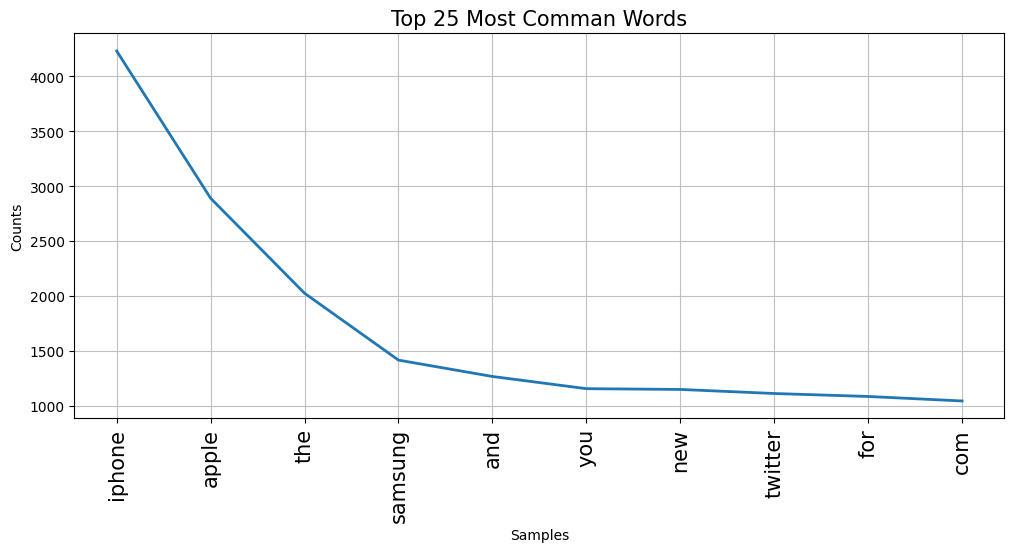

In [167]:
import matplotlib.pyplot as plt
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Comman Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(10, cumulative=False)
plt.show()

In [163]:
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'the': 2025, 'samsung': 1416, 'and': 1267, 'you': 1156, 'new': 1149, 'twitter': 1112, 'for': 1085, 'com': 1044, ...})

In [169]:
# removing stopwords
domain_stopwords = {'twitter','com','io','instragram','facebook','rt'}
combined_stopwords = combined_stopwords.union(domain_stopwords)
len(combined_stopwords)

403

In [181]:
def tweet_cleaner_with_stopwords(raw_tweet):
    '''This function cleans the raw tweet'''
    cleaned_tweet = contractions.fix(raw_tweet)
    cleaned_tweet = re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
    cleaned_tweet = re.sub("#|!|$|%\^","", cleaned_tweet)
    cleaned_tweet = re.sub(r"http\S+","",cleaned_tweet)
    cleaned_tweet = re.sub(r"[^a-zA-Z]"," ", cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower().strip()
    cleaned_tokens = [token for token in cleaned_tweet.split() if token not in combined_stopwords]
    cleaned_tokens = [token for token in cleaned_tokens if len(token)>2]
    new_sent = ''
    for token in cleaned_tokens:
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '
    return new_sent.strip()

<>:5: SyntaxWarning: invalid escape sequence '\^'
<>:5: SyntaxWarning: invalid escape sequence '\^'
C:\Users\KUMAR SUNDRAM\AppData\Local\Temp\ipykernel_26680\3376671727.py:5: SyntaxWarning: invalid escape sequence '\^'
  cleaned_tweet = re.sub("#|!|$|%\^","", cleaned_tweet)


In [183]:
tweets['cleaned_tweets_without_stopwords1'] = tweets['tweet'].apply(tweet_cleaner_with_stopwords)

In [185]:
tweets

,label,tweet,Cleaned_tweets,cleaned_tweets_without_stopwords,cleaned_tweets_without_stopwords1
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,f i n g e r p r i n t p r e g n a n c y t ...,fingerprint pregnancy test android apps beauti...
1,1,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...,f i n a l l y a t r a n s p a r a n t s ...,finally transparant silicon case thanks uncle ...
2,1,We love this! Would you go? #talk #makememorie...,love this would you talk makememories unplug r...,w e l o v e t h i s w o u l d y o u ...,love talk makememories unplug relax iphone sma...
3,1,I'm wired I know I'm George I was made that wa...,wired know george wa made that way iphone cute...,i a m w i r e d i k n o w i a m ...,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...,w h a t a m a z i n g s e r v i c e a p ...,amazing service apple talk question unless pay...
...,...,...,...,...,...
7915,1,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfie smile son...,l i v e o u t l o u d l o l l i v e o ...,live loud lol liveoutloud selfie smile sony mu...
7916,1,We would like to wish you an amazing day! Make...,would like wish you amazing day make every min...,w e w o u l d l i k e t o w i s h y ...,like wish amazing day make minute count tl tod...
7917,1,Helping my lovely 90 year old neighbor with he...,helping lovely year old neighbor with her ipad...,h e l p i n g m y l o v e l y y e ...,helping lovely year old neighbor ipad morning ...
7918,1,Finally got my #smart #pocket #wifi stay conne...,finally got smart pocket wifi stay connected a...,f i n a l l y g o t m y s m a r t p o ...,finally got smart pocket wifi stay connected a...


In [187]:
vocab_raw = []
for tweet in tweets['cleaned_tweets_without_stopwords1']:
    vocab_raw.extend(tweet.split())
print(vocab_raw)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic', 'pjiwq', 'wtc', 'bout', 'shopping', 'listening', 'music', 'iphone', 'justme', 'music', 'likeforlike', 'followforfollow', 'p

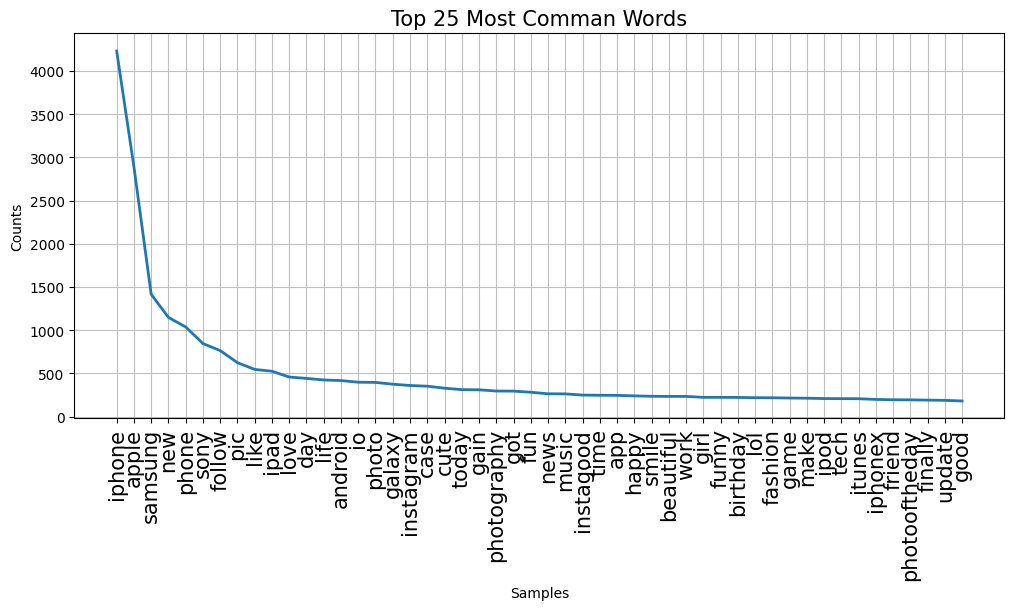

In [191]:
import matplotlib.pyplot as plt
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Comman Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

# create word clouds for better visualization

In [194]:
!pip install wordcloud pillow

In [196]:
from wordcloud import WordCloud

In [200]:
text = """The security breach where a Khalistani protester approached External Affairs Minister S. Jaishankar’s car in London overshadowed the headlines on his week-long visit to the United Kingdom and Ireland. And the Ministry of External Affairs (MEA) made its displeasure clear to the Minister’s British hosts. The scheduled visit, however, was not changed and Mr. Jaishankar side-stepped the scare, announcing that India-U.K. relations were set for a “very big pickup” despite their “complex history” and current problems. India is building its capacities in the U.K., with two consulates, in Manchester and Belfast, while Mr. Jaishankar’s extended talks with U.K. Foreign Secretary David Lammy focused on the much-delayed conclusion of a Free Trade Agreement (FTA). The Agreement, which was due to be finished after U.K.’s ‘Brexit’ in 2020, has missed deadlines. Talks over an FTA dominated discussions in Ireland too, and came days after India and the European Union (EU) committed to concluding their Bilateral Trade Agreement (BTA) — for which talks began in 2007 — by the end of 2025. Bilateral trade with the U.K. ($52 billion) and Ireland ($17 billion) are underpowered, and discussions on enhancing collaborations, especially in high-tech trade, were on the agenda in both capitals. The FTA talks, India-U.K. (restarted last month) and India-EU (another round this week), will benefit from India’s more conciliatory position on import duties with the U.S., which have been a sticking point for them as well. The government’s decision to reduce tariffs on wines and spirits, motor and electric vehicles, in deference to U.S. President Trump’s demands, is a case in point, and more cuts are expected in negotiating an India-U.S. BTA.
"""
text

'The security breach where a Khalistani protester approached External Affairs Minister S. Jaishankar’s car in London overshadowed the headlines on his week-long visit to the United Kingdom and Ireland. And the Ministry of External Affairs (MEA) made its displeasure clear to the Minister’s British hosts. The scheduled visit, however, was not changed and Mr. Jaishankar side-stepped the scare, announcing that India-U.K. relations were set for a “very big pickup” despite their “complex history” and current problems. India is building its capacities in the U.K., with two consulates, in Manchester and Belfast, while Mr. Jaishankar’s extended talks with U.K. Foreign Secretary David Lammy focused on the much-delayed conclusion of a Free Trade Agreement (FTA). The Agreement, which was due to be finished after U.K.’s ‘Brexit’ in 2020, has missed deadlines. Talks over an FTA dominated discussions in Ireland too, and came days after India and the European Union (EU) committed to concluding their B

In [202]:
wordcloud = WordCloud(stopwords = combined_stopwords)
wordcloud.generate(text)

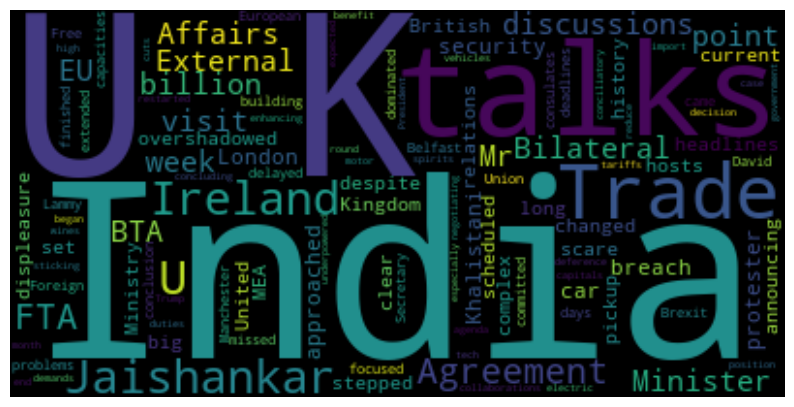

In [204]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

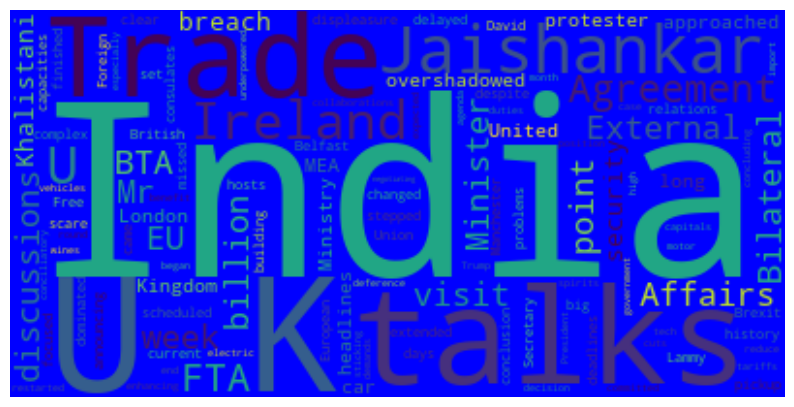

In [216]:
wordcloud = WordCloud(stopwords = combined_stopwords,
                     background_color='blue', contour_width=3, contour_color='steelblue')
wordcloud.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [218]:
tweets.to_pickle("cleaned_tweets_v1.pkl")